# Recipe 60 - Multiply features together 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [8]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

In [9]:
# print description of dataset

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# make a list with the features we want to engineer

features = ['mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry']

In [12]:
df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0.08474,0.07864,0.0869,0.07017,0.1812
2,0.10960,0.15990,0.1974,0.12790,0.2069
3,0.14250,0.28390,0.2414,0.10520,0.2597
4,0.10030,0.13280,0.1980,0.10430,0.1809


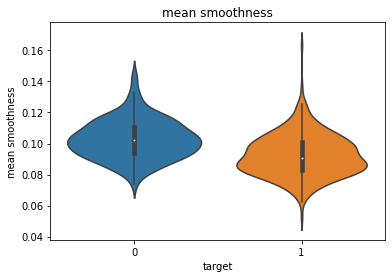

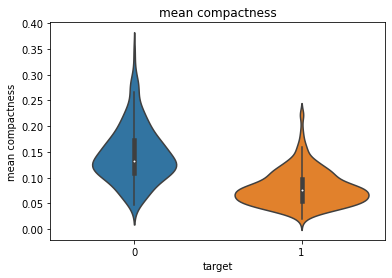

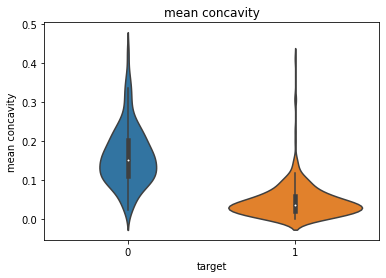

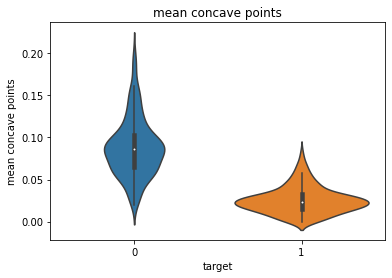

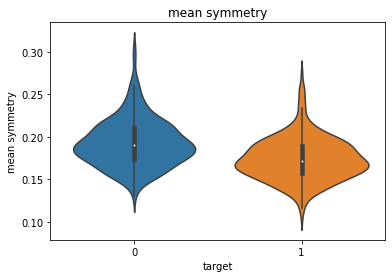

In [13]:
# make violin plots with the distribution of each feature
# violin plot = KDE + box plot

for f in features:
    sns.violinplot(x="target", y=f, data=df)
    plt.title(f)
    plt.show()

## Addition 

In [14]:
# add the features

df['added_features'] = df[features].sum(axis=1)

df['added_features'].head()

0    1.08510
1    0.50165
2    0.80170
3    1.03270
4    0.71630
Name: added_features, dtype: float64

Text(0.5, 1.0, 'Added Features')

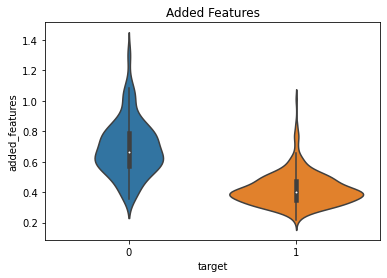

In [15]:
# violin plot with added features

sns.violinplot(x="target", y="added_features", data=df)

plt.title('Added Features')

## Product

In [16]:
# multiply the features

df['prod_features'] = df[features].prod(axis=1)

df['prod_features'].head()

0    0.000351
1    0.000007
2    0.000092
3    0.000267
4    0.000050
Name: prod_features, dtype: float64

Text(0.5, 1.0, 'Product of Features')

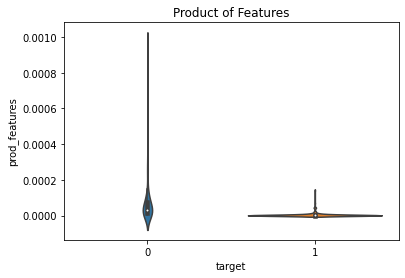

In [17]:
# violin plot with product of features

sns.violinplot(x="target", y="prod_features", data=df)

plt.title('Product of Features')

In [18]:
# mean of features

df['mean_features'] = df[features].mean(axis=1)

df['mean_features'].head()

0    0.21702
1    0.10033
2    0.16034
3    0.20654
4    0.14326
Name: mean_features, dtype: float64

Text(0.5, 1.0, 'Mean of Features')

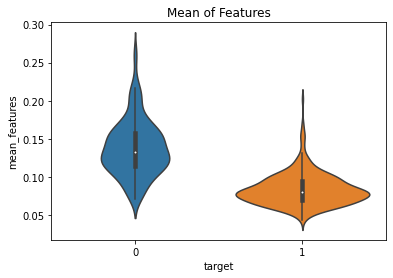

In [19]:
# violin plot with with of features

sns.violinplot(x="target", y="mean_features", data=df)

plt.title('Mean of Features')

In [20]:
# standard deviation of features

df['std_features'] = df[features].std(axis=1)

df['std_features'].head()

0    0.080321
1    0.045671
2    0.042333
3    0.078097
4    0.044402
Name: std_features, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of Features')

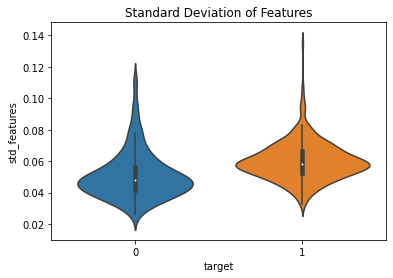

In [21]:
# violin plot with std of features

sns.violinplot(x="target", y="std_features", data=df)

plt.title('Standard Deviation of Features')

In [22]:
# maximum of features

df['max_features'] = df[features].max(axis=1)

df['max_features'].head()

0    0.3001
1    0.1812
2    0.2069
3    0.2839
4    0.1980
Name: max_features, dtype: float64

Text(0.5, 1.0, 'Maximum of Features')

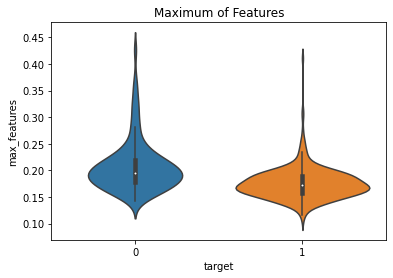

In [23]:
# violin plot with max of features

sns.violinplot(x="target", y="max_features", data=df)

plt.title('Maximum of Features')

In [24]:
# minimum of the features

df['min_features'] = df[features].min(axis=1)

df['min_features'].head()

0    0.11840
1    0.07017
2    0.10960
3    0.10520
4    0.10030
Name: min_features, dtype: float64

Text(0.5, 1.0, 'Minimum of Features')

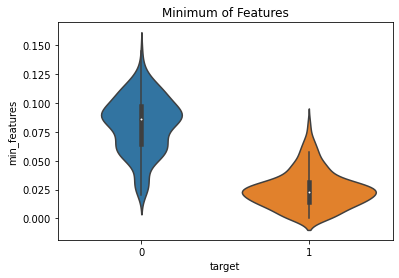

In [25]:
# violin plot with min of features

sns.violinplot(x="target", y="min_features", data=df)

plt.title('Minimum of Features')

In [26]:
# Perform all the operations in one line

df_t = df[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')
df_t.head()

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.21702,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.10033,0.045671,0.1812,0.07017
2,0.80170,0.000092,0.16034,0.042333,0.2069,0.10960
3,1.03270,0.000267,0.20654,0.078097,0.2839,0.10520
4,0.71630,0.000050,0.14326,0.044402,0.1980,0.10030


## Recipe 61 - Substraction Quotient features

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [28]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

In [29]:
# print description of dataset

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
# Difference between 2 features - method 1

df['difference'] = df['worst compactness'].sub(df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

In [32]:
# Difference between 2 features - method 2

df['difference'] = df['worst compactness'] - (df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

Text(0.5, 1.0, 'Added Features')

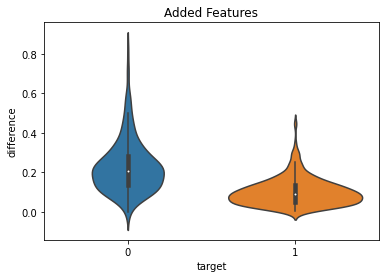

In [33]:
# violin plot of the substraction

sns.violinplot(x="target", y="difference", data=df)
plt.title('Added Features')

In [34]:
# Quotient of features - method 1

df['quotient'] = df['worst radius'].div(df['mean radius'])

df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

In [35]:
# Quotient of features - method 2

df['quotient'] = df['worst radius'] / (df['mean radius'])
df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

Text(0.5, 1.0, 'Quotient of Features')

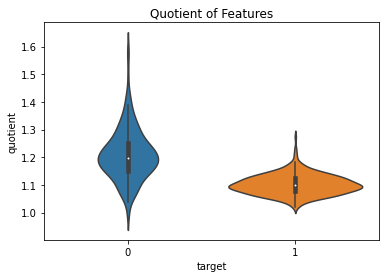

In [36]:
# violin plot with quotient

sns.violinplot(x="target", y="quotient", data=df)
plt.title('Quotient of Features')

In [37]:
# features of interest
features = ['mean smoothness', 'mean compactness', 'mean concavity',
               'mean concave points', 'mean symmetry']

# features to aggregate
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity',
               'worst concave points', 'worst symmetry']

In [38]:
# create new feature by sum of the worst features
df['worst'] = df[worst_f].sum(axis=1)

df['worst'].head()

0    2.2652
1    1.0130
2    1.6236
3    2.6843
4    1.1413
Name: worst, dtype: float64

In [39]:
df[features+['worst']].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,worst
0,0.11840,0.27760,0.3001,0.14710,0.2419,2.2652
1,0.08474,0.07864,0.0869,0.07017,0.1812,1.0130
2,0.10960,0.15990,0.1974,0.12790,0.2069,1.6236
3,0.14250,0.28390,0.2414,0.10520,0.2597,2.6843
4,0.10030,0.13280,0.1980,0.10430,0.1809,1.1413


In [40]:
# calculate the ratio of mutliple features vs the worst feature we created
# in previous cells
df[features] = df[features].div(df['worst'], axis=0)

df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.052269,0.122550,0.132483,0.064939,0.106790
1,0.083653,0.077631,0.085785,0.069269,0.178875
2,0.067504,0.098485,0.121582,0.078776,0.127433
3,0.053086,0.105763,0.089930,0.039191,0.096748
4,0.087882,0.116359,0.173486,0.091387,0.158503


## Recipe 62 -  Polynomial Features

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

In [42]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

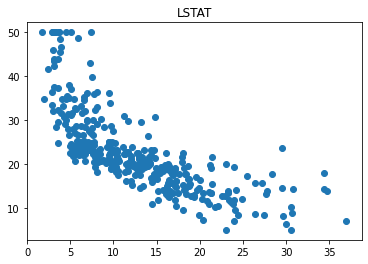

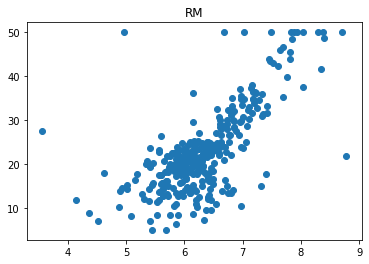

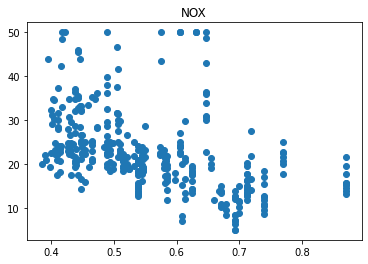

In [44]:
# plot relation of features of interest with the target

for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [45]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [46]:
# train the polynomial expansion transformer

poly.fit(X_train[['LSTAT', 'RM', 'NOX']])

PolynomialFeatures(degree=3, include_bias=False)

In [47]:
# create the new features

train_t = poly.transform(X_train[['LSTAT', 'RM', 'NOX']])
test_t = poly.transform(X_test[['LSTAT', 'RM', 'NOX']])

In [48]:
# visualise the name of the created features

poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['LSTAT',
 'RM',
 'NOX',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT NOX',
 'RM^2',
 'RM NOX',
 'NOX^2',
 'LSTAT^3',
 'LSTAT^2 RM',
 'LSTAT^2 NOX',
 'LSTAT RM^2',
 'LSTAT RM NOX',
 'LSTAT NOX^2',
 'RM^3',
 'RM^2 NOX',
 'RM NOX^2',
 'NOX^3']

In [49]:
len(poly.get_feature_names(['LSTAT', 'RM', 'NOX']))

19

In [50]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX'])


test_t.head()

,LSTAT,RM,NOX,LSTAT^2,LSTAT RM,LSTAT NOX,RM^2,RM NOX,NOX^2,LSTAT^3,LSTAT^2 RM,LSTAT^2 NOX,LSTAT RM^2,LSTAT RM NOX,LSTAT NOX^2,RM^3,RM^2 NOX,RM NOX^2,NOX^3
0,7.34,6.333,0.460,53.8756,46.48422,3.37640,40.106889,2.913180,0.211600,395.446904,341.194175,24.782776,294.384565,21.382741,1.553144,253.996928,18.449169,1.340063,0.097336
1,9.53,6.216,0.631,90.8209,59.23848,6.01343,38.638656,3.922296,0.398161,865.523177,564.542714,57.307988,368.226392,37.379481,3.794474,240.177886,24.380992,2.474969,0.251240
2,10.50,6.373,0.550,110.2500,66.91650,5.77500,40.615129,3.505150,0.302500,1157.625000,702.623250,60.637500,426.458855,36.804075,3.176250,258.840217,22.338321,1.927833,0.166375
3,19.77,5.349,0.693,390.8529,105.74973,13.70061,28.611801,3.706857,0.480249,7727.161833,2090.672162,270.861060,565.655306,73.284563,9.494523,153.044524,19.827978,2.568852,0.332813
4,12.34,6.232,0.437,152.2756,76.90288,5.39258,38.837824,2.723384,0.190969,1879.080904,948.981539,66.544437,479.258748,33.606559,2.356557,242.037319,16.972129,1.190119,0.083453


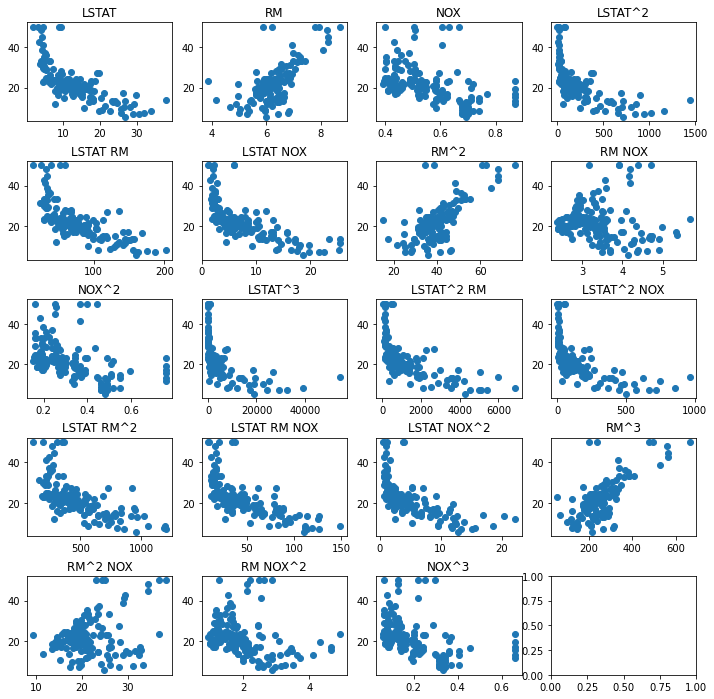

In [51]:
# plot the new features vs the target

# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

def plot_features(df):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(test_t[test_t.columns[n]], y_test)
                axs[i, j].set_title(test_t.columns[n])
                n += 1
    plt.show()
    
plot_features(test_t)

## Recipe 63 - Cobining features with trees

In [52]:
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

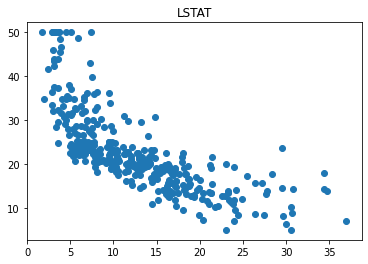

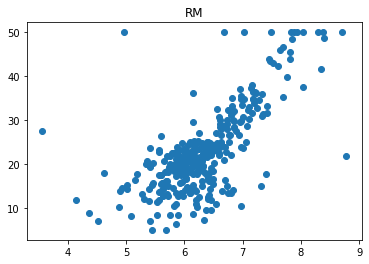

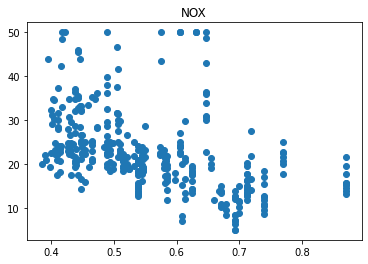

In [55]:
for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [56]:
# set up the grid with parameters to test
param_grid = {'max_depth': [3,4,None]}

In [57]:
# set up the tree within a grid search
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [58]:
# train the decision tree
tree_model.fit(X_train[['LSTAT', 'RM', 'NOX']], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, None]},
             scoring='neg_mean_squared_error')

In [59]:
# create the new feature

X_train['new_feat'] = tree_model.predict(X_train[['LSTAT', 'RM', 'NOX']])
X_test['new_feat'] = tree_model.predict(X_test[['LSTAT', 'RM', 'NOX']])

Text(0.5, 1.0, 'Tree derived feature vs House Price')

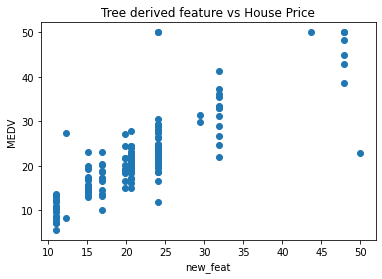

In [60]:
# plot the new feature

plt.scatter(X_test['new_feat'], y_test)
plt.ylabel('MEDV')
plt.xlabel('new_feat')
plt.title('Tree derived feature vs House Price')

## Reecipe 64 - Aggregating transactional data w/ math operations

In [63]:
import pandas as pd
import featuretools as ft

In [64]:
# load data from feature tools

data_dict = ft.demo.load_mock_customer()

In [65]:
# each table in the dictionaty is a pandas dataframe

type(data_dict["transactions"])

pandas.core.frame.DataFrame

In [66]:
# capture all 3 data tables into a pandas dataframe

data = data_dict["transactions"].merge(
    data_dict["sessions"]).merge(data_dict["customers"])

data.shape

(500, 11)

In [67]:
# select the columns with which we will work in this recipe

cols = ['customer_id',
        'transaction_id',
        'transaction_time',
        'amount'
        ]

data = data[cols]

In [68]:
# display data

data.head()

,customer_id,transaction_id,transaction_time,amount
0,2,298,2014-01-01 00:00:00,127.64
1,2,2,2014-01-01 00:01:05,109.48
2,2,308,2014-01-01 00:02:10,95.06
3,2,116,2014-01-01 00:03:15,78.92
4,2,371,2014-01-01 00:04:20,31.54


In [69]:
print('Number of customers: {}'.format(data['customer_id'].nunique()))
print('Number of transactions: {}'.format(data['transaction_id'].nunique()))

Number of customers: 5
Number of transactions: 500


In [70]:
# dispay number of transactions per customer

data.groupby('customer_id')['transaction_id'].count()

customer_id
1    126
2     93
3     93
4    109
5     79
Name: transaction_id, dtype: int64

## Aggregation with pandas

In [71]:
# make a list of the operations we want to perform
operations = ['sum', 'max', 'min', 'mean', 'median', 'std', 'count']

# make a list of the new feature names
feature_names = [
    'total_amount', 'max_amount', 'min_amount', 'mean_amount', 'median_amount',
    'std_amount', 'number of transactions'
]

df = pd.DataFrame()

# capture new features in a pandas dataframe
df[feature_names] = data.groupby('customer_id')['amount'].agg(operations)

df

,total_amount,max_amount,min_amount,mean_amount,median_amount,std_amount,number of transactions
customer_id,,,,,,,
1,9025.62,139.43,5.81,71.631905,69.715,40.442059,126
2,7200.28,146.81,8.73,77.422366,75.960,37.705178,93
3,6236.62,149.15,5.89,67.060430,58.930,43.683296,93
4,8727.68,149.95,5.73,80.070459,81.410,45.068765,109
5,6349.66,149.02,7.55,80.375443,78.870,44.095630,79


## Aggregation with Featuretools

In [73]:
# in order for feature tools to work, we need to create
# entity sets

# create and entity set and give it a name
es = ft.EntitySet(id="customer_data")

# add transactions table to the entity set
# basically we pass the entire dataframe indicating
# the transaction_id as unique identifier
# and the transaction time as the time index
# there is one unique timestamp per transaction
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=data[cols],
    index="transaction_id",
    time_index="transaction_time")

# display the entity set
es

Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 4]
  Relationships:
    No relationships

In [77]:
# now we indicate that within the entity set
# there is another table, with customer data,
# each customer identified with a unique
# customer id

es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="customers",
    index="customer_id")

es

c:\Python310\lib\site-packages\woodwork\column_schema.py:173: DuplicateTagsWarning: Semantic tag(s) 'foreign_key' already present on column 'customer_id'
  warnings.warn(
c:\Python310\lib\site-packages\featuretools\entityset\entityset.py:379: UserWarning: Not adding duplicate relationship: <Relationship: transactions.customer_id -> customers.customer_id>
  warnings.warn("Not adding duplicate relationship: " + str(relationship))


Entityset: customer_data
  DataFrames:
    transactions [Rows: 500, Columns: 4]
    customers [Rows: 5, Columns: 2]
  Relationships:
    transactions.customer_id -> customers.customer_id

In [78]:
# let's print out the operations we want to perform
# we created this list in cell 9

operations

['sum', 'max', 'min', 'mean', 'median', 'std', 'count']

In [81]:
# set up the feature creation object
# to aggregate transactions at customer level
feature_matrix, features = ft.dfs(
    entityset=es,
    target_dataframe_name="customers",
    agg_primitives=operations,
    trans_primitives=[],
    verbose=True
)
features

Built 7 features
Elapsed: 00:00 | Progress: 100%|██████████


[<Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MEDIAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>]

In [82]:
# dataframe with the new features
feature_matrix

,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MEDIAN(transactions.amount),MIN(transactions.amount),STD(transactions.amount),SUM(transactions.amount)
customer_id,,,,,,,
2,93,146.81,77.422366,75.960,8.73,37.705178,7200.28
5,79,149.02,80.375443,78.870,7.55,44.095630,6349.66
4,109,149.95,80.070459,81.410,5.73,45.068765,8727.68
1,126,139.43,71.631905,69.715,5.81,40.442059,9025.62
3,93,149.15,67.060430,58.930,5.89,43.683296,6236.62
